In [1]:
import sys
from pathlib import Path

# Add src/ to sys.path
project_root = Path().resolve().parent  # assumes you're in notebooks/
src_path = project_root / "src"
sys.path.append(str(src_path))

In [ ]:
from pathlib import Path
from wearable_htad.evaluation.metrics import evaluate_model

import pandas as pd



project_root = Path().resolve().parent
data_path = project_root / "data" / "processed" / "features_audio.csv"

df = pd.read_csv(data_path)

In [4]:
# Audio feature columns only (v1_)
audio_cols = [col for col in df.columns if col.startswith("v1_")]

# Input and target
X_audio = df[audio_cols]
y = df["label"]

# Check feature count and class distribution
print(f"Features: {len(audio_cols)}")
print("Class distribution:")
print(y.value_counts())

Features: 36
Class distribution:
label
eat_chips           282
watch_tv            206
mop_floor           181
wash_hands          180
brush_teeth         180
type_on_keyboard    179
sweep               178
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split(
    X_audio, y, test_size=0.2, stratify=y, random_state=42
)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define ML pipeline
audio_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ]
)

# Train
audio_pipeline.fit(X_audio_train, y_audio_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


Audio-Only Model Performance:

                  precision    recall  f1-score   support

     brush_teeth       0.86      0.69      0.77        36
       eat_chips       0.72      0.93      0.81        57
       mop_floor       0.69      0.61      0.65        36
           sweep       0.84      0.75      0.79        36
type_on_keyboard       0.89      0.86      0.87        36
      wash_hands       0.86      0.69      0.77        36
        watch_tv       0.87      1.00      0.93        41

        accuracy                           0.81       278
       macro avg       0.82      0.79      0.80       278
    weighted avg       0.81      0.81      0.80       278



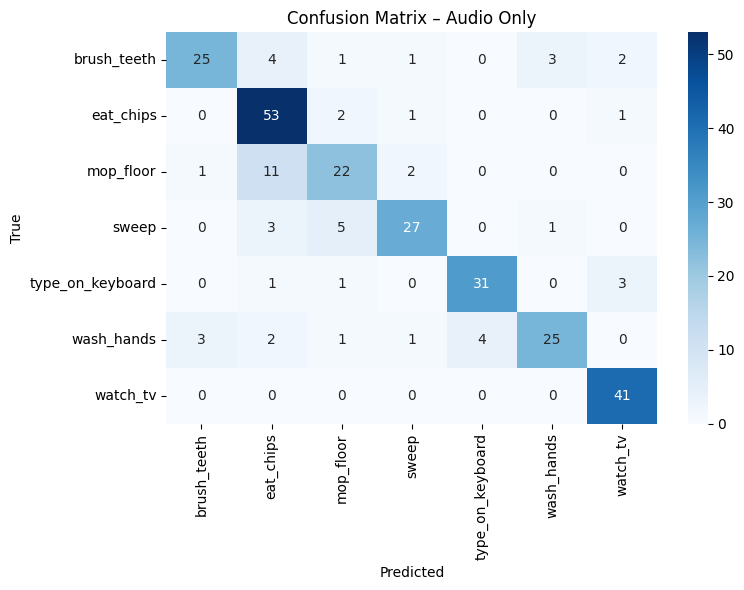

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_audio_pred = audio_pipeline.predict(X_audio_test)

# Metrics
print("Audio-Only Model Performance:\n")
print(classification_report(y_audio_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_audio_test, y_pred, labels=audio_pipeline.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=audio_pipeline.classes_,
    yticklabels=audio_pipeline.classes_,
    cmap="Blues",
)
plt.title("Confusion Matrix – Audio Only")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [16]:
from wearable_htad.evaluation.metrics import evaluate_model

# After predicting:

result_df = pd.DataFrame([evaluate_model(y_audio_test, y_audio_pred, name="Audio Model")])
result_df.to_csv(Path("outputs/audio_metrics.csv"), index=False)

In [31]:
results = []
results.append(result_audio)